## 逻辑回归（Logistic Regression)，用来解决分类问题。


#### 线性可分案例：根据两门成绩，预测学生是否会被大学录取。

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
path = '/home/alex/test/NG_exercise/ex2_logisticRegression/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Ex1', 'Ex2', 'Accept'])
data.head()

,Ex1,Ex2,Accept
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


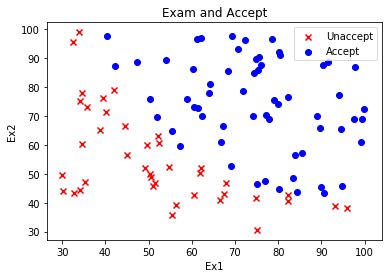

In [14]:
fig, ax = plt.subplots()
ax.scatter(data[data['Accept']==0]['Ex1'], data[data['Accept']==0]['Ex2'], c='r', marker='x', label='Unaccept')
ax.scatter(data[data['Accept']==1]['Ex1'], data[data['Accept']==1]['Ex2'], c='b', marker='o', label='Accept')
ax.legend()
ax.set(xlabel='Ex1',
       ylabel='Ex2',
       title='Exam and Accept')
ax.legend()
plt.show()

In [15]:
def get_Xy(data):
    data.insert(0, 'one', 1)  #theta0 + theta1 * x
    X = data.iloc[:, 0:-1].values #取前三列
    y = data.iloc[:,-1].values #最后一列的录取结果
    
    return X,y

In [16]:
X,y = get_Xy(data)

In [17]:
type(y)

numpy.ndarray

In [18]:
y.shape

(100,)

In [19]:
X.shape

(100, 3)

In [20]:
y = y.reshape(100,1);
#遇到的bug误差初始值被放大一百倍，在这里#y.reshape(100,1);
#没有赋值，没有改变原值
y.shape

(100, 1)

In [21]:
def sigmoid(z):
#     return np.exp(z) / (1 + np.exp(z))
    return 1 / (1 + np.exp(-z))

In [22]:
def cost_function(X, y, theta):
    
    h_theta = sigmoid(X @ theta)
    
    left = -y * np.log(h_theta)
    right = -(1 - y) * np.log(1 - h_theta)
    
    return np.sum(right + left) / len(X)


In [23]:
theta = np.zeros((3,1))

In [24]:
cost_init = cost_function(X, y, theta)

In [25]:
print(cost_init)

0.6931471805599453


In [26]:
def gradient_descent(X, y, theta, iters, alpha):
    costs = []
    M = len(X)
    for i in range(iters):
        A = sigmoid(X @ theta)
        theta = theta - (alpha / M) * X.T @ (A - y)
        cost = cost_function(X, y, theta)
        costs.append(cost)
        
        if i %1000 == 0:
            print(cost)
    return costs, theta

In [27]:
alpha = 0.004
iters = 200000

In [28]:
costs,theta_fina = gradient_descent(X, y, theta, iters, alpha)


1.9886538578930086
3.078170019864155
5.487009635362496
1.8519433661332634
2.955128942408359
5.438688730769618
1.8046128090728508
2.8312715776074047
5.3886531633606145
1.756153811712156
2.706676380747814
5.3365673644957425
1.7062807047694803
2.581850851905425
5.281774101800353
1.6544129958512057
2.457843094743577
5.223255119969365
1.5996612097145573
2.336247751941462
5.159653459570274
1.5408871901849066
2.2190492038468896
5.089387088751128
1.4768567851081464
2.1082685090536493
5.010845104587983
1.4064493632805872
2.005433890383272
4.9225734611717336
1.3288041261254444
1.9109646054893665
4.82325748482661
1.2432202250971698
1.823586612152141
4.711246821296763
1.148627793213958
1.7397667362448013
4.5832574004573505
1.0423478306006693
1.6525865746034045
4.430932868329269
0.9166267386002193
1.5465331276550875
4.224624720512682
0.7330944584991166
1.4388789955395211
1.1051134842412247
0.7982483528525463
0.27263052638150115
1.0296825591141883
0.4594428292480828
0.424140609838113
2.9555724161492

In [29]:
print(theta_fina)

[[-23.77363059]
 [  0.20686002]
 [  0.19996941]]


In [30]:
def predict(X, theta):
    
    prob = sigmoid(X @ theta_fina)
#     print(prob)
    #这段表达式比我写的高雅
    return [1 if x >= 0.5 else 0 for x in prob]

In [31]:
Acception = np.array(predict(X, theta))
Acception_pred = Acception.reshape(100,1)

In [32]:
#预测值和实际值比较，检测预测成功率
#矩阵可以直接比较，返回带T/F矩阵
accurate = [Acception_pred == y]
print("预测准确率:", np.mean(accurate))

预测准确率: 0.91


In [33]:
k1 = -theta_fina[0,0] / theta_fina[2,0]
k2 = -theta_fina[1,0] / theta_fina[2,0]

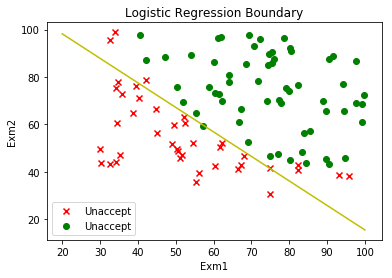

In [34]:
x = np.linspace(20, 100, 100)

#f是决策边界
f = k1 + k2 * x

fig,ax = plt.subplots()

ax.scatter(data[data['Accept']==0]['Ex1'], data[data['Accept']==0]['Ex2'], c='r', marker='x', label='Unaccept')
ax.scatter(data[data['Accept']==1]['Ex1'], data[data['Accept']==1]['Ex2'], c='g', marker='o', label='Unaccept')
ax.set(xlabel='Exm1',
       ylabel='Exm2',
       title ='Logistic Regression Boundary')
ax.legend()#是否显示图例
ax.plot(x,f,c='y')
plt.show()

### 线性不可分案例：设想做为生产主管，根据两次测试结果，决定芯片是否要被抛弃

In [685]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [686]:
path = '/home/alex/test/NG_exercise/ex2_logisticRegression/ex2data2.txt'
data = pd.read_csv(path, header=None, names=['T1','T2','Accepted'])
data.head()

,T1,T2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


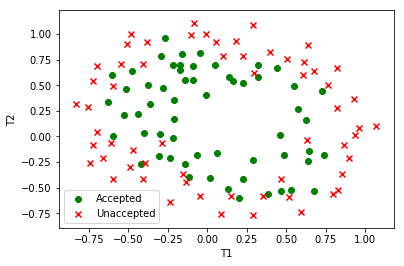

In [687]:
fig, ax = plt.subplots() 
ax.scatter(data[data['Accepted']==1]['T1'], data[data['Accepted']==1]['T2'], c='g', marker='o', label='Accepted')
ax.scatter(data[data['Accepted']==0]['T1'], data[data['Accepted']==0]['T2'], c='r', marker='x', label='Unaccepted')
ax.legend()

ax.set(xlabel='T1',
       ylabel='T2')
plt.show()

In [736]:
def feature_mapping(x1, x2, iters):
    data = {}
    for i in range(iters+1):
        for j in range(i+1):
            #值得注意关键字可以这么赋值
            data['F{}{}'.format(i-j, j)] = np.power(x1, i-j) + np.power(x2, j)
            
            print(i-j,j)
            
    return pd.DataFrame(data)

In [737]:
x1 = data['T1']
x2 = data['T2']

In [740]:
data2 = feature_mapping(x1, x2, 6)
# print(data2)

0 0
1 0
0 1
2 0
1 1
0 2
3 0
2 1
1 2
0 3
4 0
3 1
2 2
1 3
0 4
5 0
4 1
3 2
2 3
1 4
0 5
6 0
5 1
4 2
3 3
2 4
1 5
0 6


In [741]:
data2.head()

,F00,F10,F01,F20,F11,F02,F30,F21,F12,F03,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,2.0,1.051267,1.69956,1.002628,0.750827,1.489384,1.000135,0.702188,0.540651,1.342354,...,0.344982,0.290764,1.167542,1.000000,0.699560,0.489391,0.342488,0.242125,0.218809,1.117206
1,2.0,0.907258,1.68494,1.008601,0.592198,1.469143,0.999202,0.693541,0.376401,1.321335,...,0.329936,0.127353,1.150752,1.000001,0.684933,0.469217,0.320537,0.228696,0.058010,1.103256
2,2.0,0.786290,1.69225,1.045672,0.478540,1.479210,0.990239,0.737922,0.265500,1.331733,...,0.377405,0.015932,1.158970,1.000095,0.691804,0.481296,0.321973,0.275314,-0.054740,1.110047
3,2.0,0.625000,1.50219,1.140625,0.127190,1.252195,0.947266,0.642815,-0.122805,1.126650,...,0.267275,-0.311398,1.031940,1.002781,0.494774,0.271970,0.073915,0.204227,-0.343060,1.016040
4,2.0,0.486750,1.46564,1.263426,-0.047610,1.216821,0.864797,0.729066,-0.296429,1.100960,...,0.364386,-0.466239,1.021890,1.018280,0.430024,0.286214,-0.034243,0.310437,-0.491360,1.010193


In [742]:
print(data2.shape)
print(data2.size)  #M*N
print(len(data2.iloc[:,1])) #M，第一维
print(data2.iloc[0:1,0:].size)  #N，第二维

(118, 28)
3304
118
28


In [743]:
X = np.array(data2)
X.shape
# type(X)
# print(X)

(118, 28)

In [744]:
y_ = data.iloc[:,-1]
y = np.array(y_).reshape(len(y_),1)
y.shape

(118, 1)

In [745]:
def sigmoid(z):
    return np.exp(z) / (1 + np.exp(z))

In [746]:
def cost_function(X, y, theta, lamda):
    A = sigmoid(X @ theta)
    
    left = y * np.log(A)
    right = (1 - y) * np.log(1 - A)
    #代价函数中加入正则化项，防止特征弱的项带来过拟合
    reg = np.sum(np.power(theta[1:],2) * (lamda / 2 * len(X)))
    
    return  -np.sum(left + right) / len(X) + reg

In [747]:
theta = np.zeros((28,1))
lamda = 1
theta.shape

(28, 1)

In [748]:
cost_init = cost_function(X, y, theta, lamda)

In [749]:
print(cost_init)

0.6931471805599454


In [750]:
def gradient_descent(X, y, theta, alpha, iters, lamda):
    costs = []
    
    for i in range(iters):
        reg = (lamda / len(X)) * theta[1:]
        #插入0列为了保持维度相同
        reg = np.insert(reg, 0, values=0, axis=0)
        #减theta的原因暂时不明白
        theta = theta - (X.T @ (sigmoid(X@theta) - y)) * alpha / len(X) - reg
        cost = cost_function(X, y, theta, lamda)
        costs.append(cost)
    
        if i % 10000 == 0:
            print(cost)
    print(reg)
            
    return theta, costs

In [751]:
alpha = 0.001
iters = 200000
lamda = 0.01

In [752]:
theta_fina,costs = gradient_descent(X, y, theta, alpha, iters, lamda)

0.6930800817377418
0.9378492091063415
1.1256779336534686
1.1886203049248536
1.2099843921284914
1.2197360562023927
1.2262941938663434
1.231753096875773
1.236550440380521
1.2407522204267667
1.2443752278042628
1.2474517773748701
1.2500320106584042
1.2521752405054407
1.2539423663472742
1.2553911300791485
1.256573678159345
1.2575356330040264
1.2583160523466932
1.2589478630650264
[[ 0.00000000e+00]
 [ 4.92450947e-06]
 [ 1.64789492e-05]
 [-2.65937308e-05]
 [ 2.10627221e-05]
 [-1.31258478e-05]
 [-1.46879621e-06]
 [-1.04555182e-05]
 [-8.54207492e-06]
 [-2.01314505e-06]
 [-2.00461421e-05]
 [ 1.46694164e-05]
 [-4.00603152e-05]
 [ 2.57062783e-06]
 [-1.35833030e-05]
 [-5.43936827e-06]
 [-3.90792951e-06]
 [-1.49353806e-05]
 [-2.89476125e-05]
 [-8.99953014e-06]
 [-7.09446244e-06]
 [-1.49597694e-05]
 [ 1.06988443e-05]
 [-3.35127265e-05]
 [-3.82267784e-06]
 [-4.05177704e-05]
 [-2.51068956e-06]
 [-1.25372045e-05]]


In [753]:
def predict(X, theta):
    prob = sigmoid(X@theta)
    
    return [1 if x >= 0.5 else 0 for x in prob]

In [765]:
print(theta_fina.shape)
print(theta_fina)

(28, 1)
[[ 1.04545715]
 [ 0.05810917]
 [ 0.19445156]
 [-0.31380607]
 [ 0.24854013]
 [-0.15488505]
 [-0.01733183]
 [-0.12337511]
 [-0.10079648]
 [-0.02375515]
 [-0.23654452]
 [ 0.17309913]
 [-0.47271172]
 [ 0.03033342]
 [-0.16028301]
 [-0.06418458]
 [-0.04611356]
 [-0.17623749]
 [-0.34158182]
 [-0.10619444]
 [-0.08371469]
 [-0.17652532]
 [ 0.12624638]
 [-0.39545017]
 [-0.04510758]
 [-0.47810969]
 [-0.02962612]
 [-0.14793905]]


In [755]:
y_ = np.array(predict(X, theta_fina))
y_pre = y_.reshape(len(y_), 1)

acc = np.mean(y_pre==y)
print(acc)

0.7542372881355932


0 0
1 0
0 1
2 0
1 1
0 2
3 0
2 1
1 2
0 3
4 0
3 1
2 2
1 3
0 4
5 0
4 1
3 2
2 3
1 4
0 5
6 0
5 1
4 2
3 3
2 4
1 5
0 6


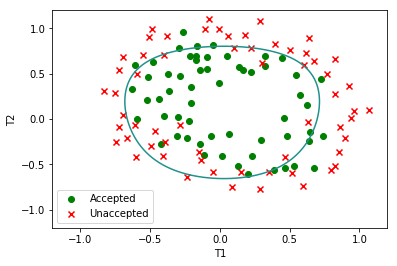

In [777]:
x = np.linspace(-1.2, 1.2, 200)  #类似于np.arange()
#这里构造网格矩阵，就是平面上的坐标点阵列
xx, yy = np.meshgrid(x,x)
#训练集用的是高次幂特征
z = feature_mapping(xx.ravel(), yy.ravel(), 6).values
#够造高次幂的网格矩阵是因为theta_fina是由高次矩阵训练的
zz = z @ theta_fina
#构造成二维
zz = zz.reshape((xx.shape))

fig,ax = plt.subplots()
ax.scatter(data[data['Accepted']==1]['T1'], data[data['Accepted']==1]['T2'], c='g', marker='o', label='Accepted')
ax.scatter(data[data['Accepted']==0]['T1'], data[data['Accepted']==0]['T2'], c='r', marker='x', label='Unaccepted')
ax.legend()
ax.set(xlabel='T1',
       ylabel='T2')
#绘制等高线图
plt.contour(xx,yy,zz,0)
plt.show()
# print(zz.shape)

In [783]:
import sys,os
os.getcwd()

'/home/alex/ML_exercise'